In [1]:
import os
path = os.getcwd() + "/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge/"
os.chdir(path)
os.getcwd()

'/home/peterm/Desktop/Projects/Python/sk/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display  
%matplotlib inline

from libs import utils
from data import data

In [3]:
train_df, subm, cxt_maize_df, cxt_peanuts_df, subm_field1, subm_field2, subm_field3, subm_field4, train_df_field1, train_df_field2, train_df_field3, train_df_field4 = data.datasets()

/home/peterm/Desktop/Projects/Python/sk/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge/data/data.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  subm_field1.loc['datetime'] = pd.to_datetime(subm_field1['datetime'])
/home/peterm/Desktop/Projects/Python/sk/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge/data/data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  subm_field2.loc['datetime'] = pd.to_datetime(subm_field2['datetime'])
/home/peterm/Desktop/Projects/Python/sk/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge/data/data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [4]:
print("train_df")
display(train_df.head())
print("cxt_maize_df")
display(cxt_maize_df.tail())
print("cxt_peanuts_df")
display(cxt_peanuts_df.tail())

train_df
cxt_maize_df
cxt_peanuts_df


,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
88,5-May,17.6,34.8,77.0,5.5,11.5,27.1,1.15,6.73,7.74,0.0,30.958,0.000,80.132
89,6-May,17.9,38.0,69.0,5.5,12.9,29.3,1.15,8.40,9.66,0.0,38.640,69.598,0.000
90,7-May,19.2,43.1,62.0,5.5,14.7,31.9,1.15,10.66,12.26,0.0,49.036,0.000,0.000
91,8-May,19.2,45.6,53.0,5.5,15.7,33.5,1.15,12.30,14.15,0.0,56.580,105.616,144.256
92,9-May,21.3,45.2,53.0,5.5,14.6,31.9,1.15,11.95,13.74,0.0,54.970,0.000,0.000


,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
88,5-May,17.6,34.8,77.0,5.5,11.5,27.1,1.15,6.73,7.74,0.0,0.0,30.958,0.000
89,6-May,17.9,38.0,69.0,5.5,12.9,29.3,1.15,8.40,9.66,0.0,0.0,38.640,69.598
90,7-May,19.2,43.1,62.0,5.5,14.7,31.9,1.15,10.66,12.26,0.0,0.0,49.036,0.000
91,8-May,19.2,45.6,53.0,5.5,15.7,33.5,1.15,12.30,14.15,0.0,0.0,56.580,105.616
92,9-May,21.3,45.2,53.0,5.5,14.6,31.9,1.15,11.95,13.74,0.0,0.0,54.970,0.000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
timestamp               28049 non-null object
Soil humidity 1         8917 non-null float64
Irrigation field 1      10066 non-null float64
Soil humidity 2         26304 non-null float64
Irrigation field 2      28029 non-null float64
Soil humidity 3         16086 non-null float64
Irrigation field 3      17236 non-null float64
Soil humidity 4         26306 non-null float64
Irrigation field 4      28029 non-null float64
Air temperature (C)     23995 non-null float64
Air humidity (%)        23995 non-null float64
Pressure (KPa)          23995 non-null float64
Wind speed (Km/h)       23995 non-null float64
Wind gust (Km/h)        23995 non-null float64
Wind direction (Deg)    23995 non-null float64
dtypes: float64(14), object(1)
memory usage: 3.2+ MB


In [6]:
cxt_maize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
Date                93 non-null object
Min_Temp            71 non-null float64
Max_Temp            71 non-null float64
Humidity            71 non-null float64
Wind_Speed          71 non-null float64
Solar_Irradiance    71 non-null float64
Sun                 71 non-null float64
Kc                  83 non-null float64
ETc                 71 non-null float64
ETo                 70 non-null float64
Rainfall            83 non-null float64
Water_Need_1day     70 non-null float64
Water_Need_2days    70 non-null float64
Water_Need_3days    70 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.2+ KB


In [7]:
cxt_peanuts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
Date                93 non-null object
Min_Temp            71 non-null float64
Max_Temp            71 non-null float64
Humidity            71 non-null float64
Wind_Speed          71 non-null float64
Solar_Irradiance    71 non-null float64
Sun                 71 non-null float64
Kc                  83 non-null float64
ETc                 76 non-null float64
ETo                 75 non-null float64
Rainfall            88 non-null float64
Water_Need_1day     88 non-null float64
Water_Need_2days    75 non-null float64
Water_Need_3days    75 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.2+ KB


You are provided with data from four fields on which to train your model. You will need to predict, in 5-minute increments, the last four days for soil humidities in fields 1 and 3 and you will need to predict, in 5-minute increments, the last six days for soil humidities in fields 2 and 4.

The fields were irrigated and growing crops as follows:

    Field 1: Maize, less water irrigation
    
    Field 2: Peanuts, irrigation based on water loss
    
    Field 3: Peanuts, less water irrigation
    
    Field 4: Peanuts, normal irrigation

Context data: Previous days

The last four days for soil humidities in fields 1 and 3 and the last six days for soil humidities in fields 2 and 4 have been removed as the test set. However, where the soil humidity peaks due to irrigation within the testset, you are provided with the peak soil humidity.

In [46]:
# definitions
#!cat 'data/VariableDefinitions.csv'
pd.set_option('display.max_colwidth', 300) #default:50
display(pd.read_csv("data/VariableDefinitions.csv").dropna())

,Variabe Definitions,Unnamed: 1
2,timestamp,Time of recording in yyyy-mmm-dd hh-mm-ss
3,Soil_humidity_1,Soil humidity of field 1
4,Irrigation field 1,"1=irrigation on, 0=irrigation off"
5,Soil_humidity_2,Soil humidity of field 2
6,Irrigation field 2,"1=irrigation on, 0=irrigation off"
7,Soil_humidity_3,Soil humidity of field 3
8,Irrigation field 3,"1=irrigation on, 0=irrigation off"
9,Soil_humidity_4,Soil humidity of field 4
10,Irrigation field 4,"1=irrigation on, 0=irrigation off"
11,Air_temperature,Temprature of the air in degrees Celcius


In [8]:
display(subm.head(2))
display(subm.tail(2))

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,NaN
1,2019-03-25 22:55:00 x Soil humidity 1,NaN


,ID,Values
5780,2019-05-31 07:40:00 x Soil humidity 4,NaN
5781,2019-05-31 07:45:00 x Soil humidity 4,NaN


In [4]:
display(subm_field1.head(2))
display(subm_field2.head(2))
display(subm_field3.head(2))
display(subm_field4.head(2))

,ID,Values
datetime,,
2019-03-25 22:50:00,2019-03-25 22:50:00 x Soil humidity 1,NaT
2019-03-25 22:55:00,2019-03-25 22:55:00 x Soil humidity 1,NaT


,ID,Values
datetime,,
2019-05-25 07:45:00,2019-05-25 07:45:00 x Soil humidity 2,NaT
2019-05-25 07:50:00,2019-05-25 07:50:00 x Soil humidity 2,NaT


,ID,Values
datetime,,
2019-04-19 20:15:00,2019-04-19 20:15:00 x Soil humidity 3,NaT
2019-04-19 20:20:00,2019-04-19 20:20:00 x Soil humidity 3,NaT


,ID,Values
datetime,,
2019-05-25 07:45:00,2019-05-25 07:45:00 x Soil humidity 4,NaT
2019-05-25 07:50:00,2019-05-25 07:50:00 x Soil humidity 4,NaT


In [10]:
display(train_df_field1.head(1))
display(train_df_field2.head(1))
display(train_df_field3.head(1))
display(train_df_field4.head(1))

,Soil humidity 1,Irrigation field 1,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg),time_of_day,month,...,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-23,67.92,0.0,19.52,55.04,101.5,2.13,6.3,225.0,0,2,...,5.6,13.0,26.2,0.4,10.66,4.26,0.0,17.056,36.144,0.0


,Soil humidity 2,Irrigation field 2,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg),time_of_day,month,...,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-23,55.72,0.0,19.52,55.04,101.5,2.13,6.3,225.0,0,2,...,5.6,13.0,26.2,0.4,10.66,4.26,0.0,0.0,17.056,36.144


,Soil humidity 3,Irrigation field 3,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg),time_of_day,month,...,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-23,-1.56,1.0,19.52,55.04,101.5,2.13,6.3,225.0,0,2,...,5.6,13.0,26.2,0.4,10.66,4.26,0.0,0.0,17.056,36.144


,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg),time_of_day,month,...,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-23,26.57,1.0,19.52,55.04,101.5,2.13,6.3,225.0,0,2,...,5.6,13.0,26.2,0.4,10.66,4.26,0.0,0.0,17.056,36.144


In [5]:
train_df_field2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28049 entries, 2019-02-23 00:00:00 to 2019-05-31 09:20:00
Data columns (total 24 columns):
Soil humidity 2         26304 non-null float64
Irrigation field 2      28029 non-null float64
Air temperature (C)     23995 non-null float64
Air humidity (%)        23995 non-null float64
Pressure (KPa)          23995 non-null float64
Wind speed (Km/h)       23995 non-null float64
Wind gust (Km/h)        23995 non-null float64
Wind direction (Deg)    23995 non-null float64
time_of_day             28049 non-null int64
month                   28049 non-null int64
week_of_year            28049 non-null int64
Min_Temp                19008 non-null float64
Max_Temp                19008 non-null float64
Humidity                19008 non-null float64
Wind_Speed              19008 non-null float64
Solar_Irradiance        19008 non-null float64
Sun                     19008 non-null float64
Kc                      19008 non-null float64
ETc             

## Dealing with Nans in output col..

In [4]:
train_df_field1_saved = train_df_field1.copy()
train_df_field2_saved = train_df_field2.copy()
train_df_field3_saved = train_df_field3.copy()
train_df_field4_saved = train_df_field4.copy()

In [13]:
# train_df_field1 = train_df_field1_saved.copy()
# train_df_field2 = train_df_field2_saved.copy()
# train_df_field3 = train_df_field3_saved.copy()
# train_df_field4 = train_df_field4_saved.copy()

In [5]:
humidity_field1 = train_df_field1[['Soil humidity 1']]
humidity_field2 = train_df_field2[['Soil humidity 2']]
humidity_field3 = train_df_field3[['Soil humidity 3']]
humidity_field4 = train_df_field4[['Soil humidity 4']]

In [15]:
print(humidity_field1.loc[pd.isna(humidity_field1['Soil humidity 1'])].shape, humidity_field1.shape,
humidity_field1.loc[pd.isna(humidity_field1['Soil humidity 1'])].shape[0]/humidity_field1.shape[0])
print(humidity_field2.loc[pd.isna(humidity_field2['Soil humidity 2'])].shape, humidity_field2.shape,
humidity_field2.loc[pd.isna(humidity_field2['Soil humidity 2'])].shape[0]/humidity_field2.shape[0])
print(humidity_field3.loc[pd.isna(humidity_field3['Soil humidity 3'])].shape, humidity_field3.shape,
humidity_field3.loc[pd.isna(humidity_field3['Soil humidity 3'])].shape[0]/humidity_field3.shape[0])
print(humidity_field4.loc[pd.isna(humidity_field4['Soil humidity 4'])].shape, humidity_field4.shape,
humidity_field4.loc[pd.isna(humidity_field4['Soil humidity 4'])].shape[0]/humidity_field4.shape[0])

(19132, 1) (28049, 1) 0.6820920531926272
(1745, 1) (28049, 1) 0.06221255659738315
(11963, 1) (28049, 1) 0.42650361866733216
(1743, 1) (28049, 1) 0.06214125280758672


### Field 2 and 4..

In [0]:
humidity_field2.loc[pd.isna(humidity_field2['Soil humidity 2'])].index

In [0]:
humidity_field4.loc[pd.isna(humidity_field4['Soil humidity 4'])].index

In [6]:
hum2 = humidity_field2.loc[
            '2019-05-25 07:45:00':'2019-05-31 09:20:00'
            ].loc[
                ~pd.isna(humidity_field2['Soil humidity 2'])
]
hum4 = humidity_field4.loc[
            '2019-05-25 07:45:00':'2019-05-31 09:20:00'
            ].loc[
                ~pd.isna(humidity_field4['Soil humidity 4'])
]

In [0]:
display(hum2)
display(hum4)

Seems like for the datetime range that data is missing for 2 and 4, there are a few (approximately <0.3%) recorded values. 
    
    1. Set them to Nan for now

In [6]:
humidity_field2.loc[
    '2019-05-25 07:45:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field2['Soil humidity 2']),'Soil humidity 2'] = np.nan
humidity_field4.loc[
    '2019-05-25 07:45:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field4['Soil humidity 4']),'Soil humidity 4'] = np.nan

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

### Field 1 and 3...

In [0]:
humidity_field1.loc[pd.isna(humidity_field1['Soil humidity 1'])].index

In [0]:
humidity_field3.loc[pd.isna(humidity_field3['Soil humidity 3'])].index

In [8]:
hum1 = humidity_field1.loc[
        '2019-03-25 22:50:00':'2019-05-31 09:20:00'
        ].loc[
            ~pd.isna(humidity_field1['Soil humidity 1'])
]
hum3 = humidity_field3.loc[
        '2019-04-19 20:15:00':'2019-05-31 09:20:00'
        ].loc[
            ~pd.isna(humidity_field3['Soil humidity 3'])
]

In [0]:
display(hum1)
display(hum3)

Humidity data missing from most of the period between **2019-03-25 22:50:00 and 2019-05-31 09:20:00** for **field 1** and between **2019-04-19 20:15:00 to 2019-05-31 09:20:00** for **field 3**
    
    1. As with field 2 and 4, set the outliers to nan

In [7]:
humidity_field1.loc[
    '2019-03-25 22:50:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field1['Soil humidity 1']),'Soil humidity 1'] = np.nan
humidity_field3.loc[
    '2019-04-19 20:15:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field3['Soil humidity 3']),'Soil humidity 3'] = np.nan

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Visualization..

In [0]:
display(humidity_field1.plot())
plt.ylabel('humidity_field1');
display(humidity_field2.plot())
plt.ylabel('humidity_field2');
display(humidity_field3.plot())
plt.ylabel('humidity_field3');
display(humidity_field4.plot())
plt.ylabel('humidity_field4');

In [8]:
# Update
train_df_field1['Soil humidity 1'] = humidity_field1
train_df_field2['Soil humidity 2'] = humidity_field2
train_df_field3['Soil humidity 3'] = humidity_field3
train_df_field4['Soil humidity 4'] = humidity_field4
# Separate the test set for the competition
train_df_field1.dropna(subset=['Soil humidity 1'], inplace=True)
train_df_field2.dropna(subset=['Soil humidity 2'], inplace=True)
train_df_field3.dropna(subset=['Soil humidity 3'], inplace=True)
train_df_field4.dropna(subset=['Soil humidity 4'], inplace=True)
# INcase targets are needed separately
humidity_field1 = train_df_field1[['Soil humidity 1']]
humidity_field2 = train_df_field2[['Soil humidity 2']]
humidity_field3 = train_df_field3[['Soil humidity 3']]
humidity_field4 = train_df_field4[['Soil humidity 4']]

## Dealing with NANs in external features

In [11]:
# train_df_field2[train_df_field2.columns[1:]] = train_df_field2[train_df_field2.columns[1:]].fillna(method='bfill')
# train_df_field2[train_df_field2.columns[1:]] = train_df_field2[train_df_field2.columns[1:]].fillna(method='ffill')

## Field 2

### Drift: Using just time..


In [27]:
train_df_field2.columns

Index(['Soil humidity 2', 'Irrigation field 2', 'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)', 'time_of_day', 'month',
       'week_of_year', 'Min_Temp', 'Max_Temp', 'Humidity', 'Wind_Speed',
       'Solar_Irradiance', 'Sun', 'Kc', 'ETc', 'ETo', 'Rainfall',
       'Water_Need_1day', 'Water_Need_2days', 'Water_Need_3days'],
      dtype='object')

In [28]:
train_df_field2.shape

(26301, 24)

In [9]:
train_df_field2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26301 entries, 2019-02-23 00:00:00 to 2019-05-25 07:40:00
Data columns (total 24 columns):
Soil humidity 2         26301 non-null float64
Irrigation field 2      26301 non-null float64
Air temperature (C)     23995 non-null float64
Air humidity (%)        23995 non-null float64
Pressure (KPa)          23995 non-null float64
Wind speed (Km/h)       23995 non-null float64
Wind gust (Km/h)        23995 non-null float64
Wind direction (Deg)    23995 non-null float64
time_of_day             26301 non-null int64
month                   26301 non-null int64
week_of_year            26301 non-null int64
Min_Temp                19008 non-null float64
Max_Temp                19008 non-null float64
Humidity                19008 non-null float64
Wind_Speed              19008 non-null float64
Solar_Irradiance        19008 non-null float64
Sun                     19008 non-null float64
Kc                      19008 non-null float64
ETc             

In [20]:
train_df_field2.index

DatetimeIndex(['2019-02-23 00:00:00', '2019-02-23 00:05:00',
               '2019-02-23 00:10:00', '2019-02-23 00:15:00',
               '2019-02-23 00:20:00', '2019-02-23 00:25:00',
               '2019-02-23 00:30:00', '2019-02-23 00:35:00',
               '2019-02-23 00:40:00', '2019-02-23 00:45:00',
               ...
               '2019-05-25 06:55:00', '2019-05-25 07:00:00',
               '2019-05-25 07:05:00', '2019-05-25 07:10:00',
               '2019-05-25 07:15:00', '2019-05-25 07:20:00',
               '2019-05-25 07:25:00', '2019-05-25 07:30:00',
               '2019-05-25 07:35:00', '2019-05-25 07:40:00'],
              dtype='datetime64[ns]', name='datetime', length=26301, freq=None)

In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# perform train/test split
cutoff_field2 = '2019-05-20'
target_field2 = 'Soil humidity 2'
df_train, df_test, y_train, y_test = utils.ts_train_test_split(train_df_field2, cutoff_field2, target_field2)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24768 entries, 2019-02-23 00:00:00 to 2019-05-19 23:55:00
Data columns (total 24 columns):
Soil humidity 2         24768 non-null float64
Irrigation field 2      24768 non-null float64
Air temperature (C)     22462 non-null float64
Air humidity (%)        22462 non-null float64
Pressure (KPa)          22462 non-null float64
Wind speed (Km/h)       22462 non-null float64
Wind gust (Km/h)        22462 non-null float64
Wind direction (Deg)    22462 non-null float64
time_of_day             24768 non-null int64
month                   24768 non-null int64
week_of_year            24768 non-null int64
Min_Temp                19008 non-null float64
Max_Temp                19008 non-null float64
Humidity                19008 non-null float64
Wind_Speed              19008 non-null float64
Solar_Irradiance        19008 non-null float64
Sun                     19008 non-null float64
Kc                      19008 non-null float64
ETc             

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1533 entries, 2019-05-20 00:00:00 to 2019-05-25 07:40:00
Data columns (total 24 columns):
Soil humidity 2         1533 non-null float64
Irrigation field 2      1533 non-null float64
Air temperature (C)     1533 non-null float64
Air humidity (%)        1533 non-null float64
Pressure (KPa)          1533 non-null float64
Wind speed (Km/h)       1533 non-null float64
Wind gust (Km/h)        1533 non-null float64
Wind direction (Deg)    1533 non-null float64
time_of_day             1533 non-null int64
month                   1533 non-null int64
week_of_year            1533 non-null int64
Min_Temp                0 non-null float64
Max_Temp                0 non-null float64
Humidity                0 non-null float64
Wind_Speed              0 non-null float64
Solar_Irradiance        0 non-null float64
Sun                     0 non-null float64
Kc                      0 non-null float64
ETc                     0 non-null float64
ETo          

In [0]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train_df[target_field2])
plt.xlabel('Lag (5minute steps)')
#plt.xlim([0, 1000]);

In [10]:
# construct and train pipeline
time = utils.IndexSelector()
poly = PolynomialFeatures()
scaler = StandardScaler()
svr = SVR(gamma='auto')
pipe = Pipeline([('indices', time),
                 ('drift', poly),
                 ('scaler', scaler),
                 ('regressor', svr)])

pipe.fit(df_train, y_train)

# evaluate on test set
print("Test set R^2: {:g}".format(pipe.score(df_test, y_test)))
print("Test set RMSE: {:g}".format(np.sqrt(mean_squared_error(pipe.predict(df_test), y_test))))

Test set R^2: -0.172756
Test set RMSE: 17.7317


In [11]:
# make predictions and get residuals
y_pred = pipe.predict(df_train)
residuals = y_train - y_pred

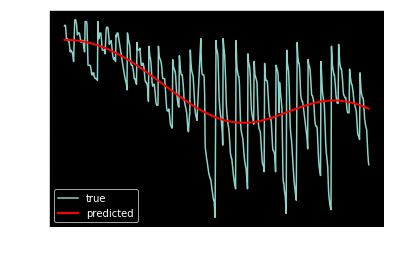

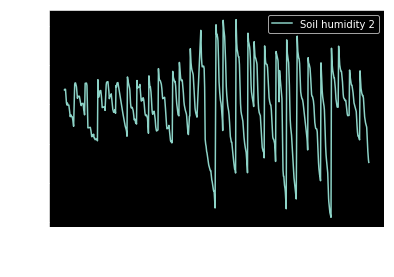

In [12]:
utils.plot_results(df_train, target_field2, y_pred, residuals=residuals)

### Try adding external components..

In [40]:
from sklearn.pipeline import FeatureUnion

time = utils.IndexSelector()
poly = PolynomialFeatures()
scaler = StandardScaler()
svr = SVR(gamma='auto')
# cols = ['Air temperature (C)',
#        'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
#        'Wind gust (Km/h)', 'Wind direction (Deg)']
cols = df_train.columns[1:] #all apart from target
weather = utils.WeatherComponents(cols)
union = FeatureUnion([('indices', time), ('weather', weather)])
pipe1_ext = Pipeline([('union', union)])
df_train_ext = pipe1_ext.transform(df_train) 
df_test_ext = pipe1_ext.transform(df_test) 
# this resolves:
"""ValueError: Input contains NaN, infinity or a value too large for dtype('float64')"""
pipe2_ext = Pipeline([('scaler', scaler),
                        ('regressor', svr)])
pipe2_ext.fit(df_train_ext, y_train)

# evaluate
# doesn't work. large number of nans in external feats columns for df_test
print("Test set R^2: {:g}".format(pipe2_ext.score(df_test_ext),y_test)) 
print("Test set RMSE: {:g}".format(np.sqrt(mean_squared_error(pipe2_ext.predict(df_test_ext), y_test))))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
# make predictions and get residuals
y_pred_ext = pipe2_ext.predict(df_train_ext)
residuals_ext = y_train - y_pred_ext

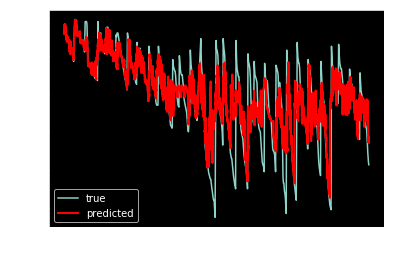

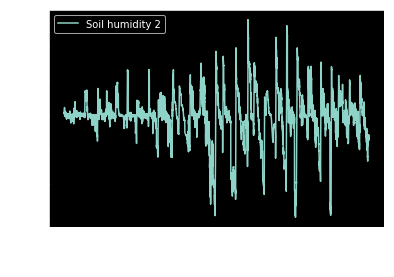

In [38]:
utils.plot_results(df_train, target_field2, y_pred_ext, residuals=residuals_ext)

## AR/ARMA
### Field 2

In [0]:
# from statsmodels.tsa.ar_model import AR

# lag=200
# ar = AR(y_train, dates=df_train.index)
# ar = ar.fit(maxlag=lag)
# ar_train_pred = ar.predict(start=lag, end=len(df_train)-1)
# print("Train set RMSE: {:g}".format(np.sqrt(mean_squared_error(ar_train_pred, y_train[lag:]))))

In [0]:
# # plot training set results
# ax = plt.subplot();
# to_plot = df_train[target_field2]
# to_plot.plot(ax=ax);
# pd.DataFrame(ar_train_pred,index=df_train.index[lag:]).plot(ax=ax, color='red', marker=None, linestyle='solid',linewidth=1,markersize=None);
# # plt.xlabel('year')
# plt.ylabel(target_field2)
# plt.legend(['true', 'predicted']);
# plt.show();

In [0]:
# plot 20 step forecast of test set
# steps = y_test.shape[0]
# ar_test_pred = ar.predict(start=len(df_train), end=len(df_train) + steps - 1)

In [0]:
# # plot test set results
# plt.plot(range(1, steps+1), y_test.iloc[:steps])
# plt.plot(range(1, steps+1), ar_test_pred)
# plt.xlabel('step')
# plt.ylabel('actual')
# plt.legend(['true', 'predicted'])

## Seasonality..
### Field 2

In [13]:
from scipy import fftpack

In [14]:
resd = residuals-residuals.mean()
Y = fftpack.fft(resd/np.std(residuals)) #(residuals.max() - residuals.min())
Y

array([ 9.26814181e-13   +0.j        , -8.83510353e+02-1253.02445046j,
        5.02938363e+02 -675.37239265j, ...,
        1.23752972e+03 -962.14927209j,  5.02938363e+02 +675.37239265j,
       -8.83510353e+02+1253.02445046j])

In [82]:
t_span = humidity_field2.index[-1] - humidity_field2.index[0]
t_span = ((t_span.days * 3600 * 24) + t_span.seconds) //(60*5) #every 5 mins
# t_span = t_span.days/30 #every month
t_span

26300

In [83]:
f = np.linspace(0, len(Y), len(Y))/t_span
f[:50]

array([0.00000000e+00, 3.80243489e-05, 7.60486978e-05, 1.14073047e-04,
       1.52097396e-04, 1.90121745e-04, 2.28146093e-04, 2.66170442e-04,
       3.04194791e-04, 3.42219140e-04, 3.80243489e-04, 4.18267838e-04,
       4.56292187e-04, 4.94316536e-04, 5.32340885e-04, 5.70365234e-04,
       6.08389583e-04, 6.46413931e-04, 6.84438280e-04, 7.22462629e-04,
       7.60486978e-04, 7.98511327e-04, 8.36535676e-04, 8.74560025e-04,
       9.12584374e-04, 9.50608723e-04, 9.88633072e-04, 1.02665742e-03,
       1.06468177e-03, 1.10270612e-03, 1.14073047e-03, 1.17875482e-03,
       1.21677917e-03, 1.25480351e-03, 1.29282786e-03, 1.33085221e-03,
       1.36887656e-03, 1.40690091e-03, 1.44492526e-03, 1.48294961e-03,
       1.52097396e-03, 1.55899831e-03, 1.59702265e-03, 1.63504700e-03,
       1.67307135e-03, 1.71109570e-03, 1.74912005e-03, 1.78714440e-03,
       1.82516875e-03, 1.86319310e-03])

In [84]:
freqs = f[:len(Y)//2]
amps = np.abs(Y[:len(Y)//2])/len(Y)

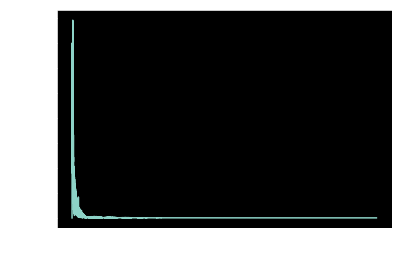

In [85]:
plt.plot(freqs, amps);
plt.xlabel('frequency (1/5 mins)')
plt.ylabel('amplitude');

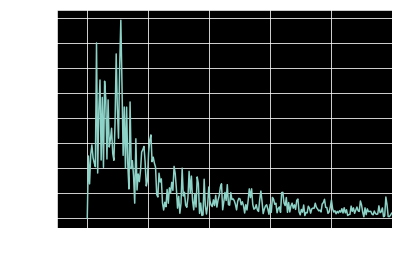

In [88]:
#plt.style.use('ggplot')
plt.plot(freqs, amps);
plt.grid(True)
plt.xlim([-.001,.01])
plt.xlabel('frequency (1/month)')
plt.ylabel('amplitude');

In [89]:
grad = np.diff(amps)

In [98]:
#get the peaks
dominant_freqs = [] # number of times in a month
for ix in range(freqs.shape[0]): 
    if ix!=freqs.shape[0]-1:
        if amps[ix] >= 0.025 and diff[ix-1] > 0 and diff[ix] <= 0: dominant_freqs.append(freqs[ix])
dominant_freqs

[3.8024348909018363e-05,
 0.00015209739563607345,
 0.0003041947912721469,
 0.00041826783799920204,
 0.0004943165358172387,
 0.0005703652336352755,
 0.0006844382803623306,
 0.0007985113270893856,
 0.0009506087227254592,
 0.0011027061183615326,
 0.0012167791650885876,
 0.0012928278629066245,
 0.0014069009096336796,
 0.0014829496074517162,
 0.0015970226541787713,
 0.0016730713519968082,
 0.0018631930965418999,
 0.00209133918999601,
 0.002167387887814047,
 0.002357509632359139,
 0.0024335583301771753,
 0.002623680074722267,
 0.002699728772540304,
 0.0027757774703583405,
 0.0028518261681763774,
 0.003117996610539506,
 0.0031940453083575426,
 0.0033461427039936163,
 0.0034221914018116527,
 0.0036123131463567447,
 0.003840459239810855,
 0.003992556635446928,
 0.00441082447344613,
 0.004524897520173186,
 0.004600946217991222,
 0.004715019264718278,
 0.005323408847262571,
 0.005399457545080608,
 0.005703652336352755,
 0.006426114965624104]

In [12]:
dominant_freqs = [2.637469124326637,
 3.2968364054082957,
 3.626520045949125,
 4.2858873270307845,
 4.945254608112443,
 5.274938248653274,
 5.9343055297349325,
 8.242091013520739,
 8.571774654061569,
 9.231141935143228,
 9.560825575684058,
 9.890509216224887,
 10.549876497306547,
 11.209243778388206,
 12.198294700010694]

In [106]:
from sklearn.pipeline import FeatureUnion

time = utils.IndexSelector()
poly = PolynomialFeatures(degree=3)
scaler = StandardScaler()
svr = SVR(gamma='auto')
fourier = utils.FourierComponents(dominant_freqs)
union = FeatureUnion([('drift', poly), ('fourier', fourier)])
baseline = Pipeline([('indices', time),
                    ('union', union),
                    ('scaler', scaler),
                    ('regressor', svr)
                    ])
# train using the time values only
# validate against the known humidity values
baseline.fit(df_train, y_train)
#test = baseline.fit_transform(df_train)

# evaluate on test set
print("Test set R^2: {:g}".format(baseline.score(df_test, y_test)))
print("Test set RMSE: {:g}".format(np.sqrt(mean_squared_error(baseline.predict(df_test), y_test))))

Test set R^2: -0.147936
Test set RMSE: 17.5431


In [100]:
# make predictions and get residuals
y_pred = baseline.predict(df_train)
residuals = y_train - y_pred

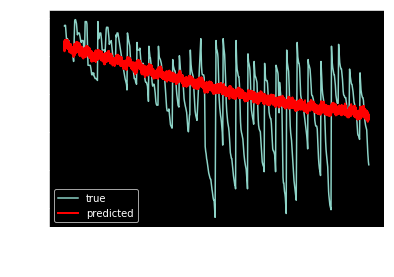

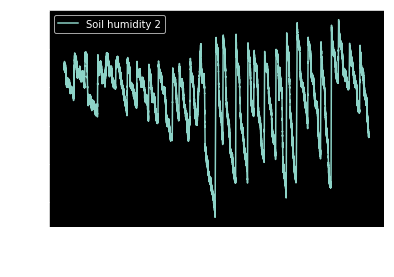

In [101]:
utils.plot_results(df_train, target_field2, y_pred, residuals=residuals)

## Modeling noise

In [0]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(residuals)
plt.xlabel('Lag (5minute steps)')
plt.xlim([0, 200]);

Seems like after about 100 steps in the past the correlation becomes insignificant

## Full Model

In [102]:
from sklearn.metrics import r2_score

steps = df_test.shape[0]
window = 100
# create residual model
scaler = StandardScaler()
svr = SVR(gamma='auto')
# cols = ['Air temperature (C)',
#        'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
#        'Wind gust (Km/h)', 'Wind direction (Deg)']
cols = df_train.columns[1:] #all apart from target

residual_feats = utils.ResidualFeatures(cols=cols, residuals_col='residuals', window=window)
residual_model = Pipeline([('residual_features', residual_feats),
                            ('scaler', scaler),
                            ('regressor', svr)
                            ])
# construct and train full model
full_model = utils.FullModel(baseline, residual_model, steps=steps, residuals_col='residuals')
full_model = full_model.fit(df_train, y_train)

# evaluate on test set
y_pred = full_model.predict(df_test)
print("Test set R^2: {:g}".format(r2_score(y_test, y_pred)))
print("Residual test set RMSE: {:g}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
Test set R^2: -0.365289
Residual test set RMSE: 19.132


In [103]:
#et new residuals after pred--for plotting
resd_test = y_test - y_pred

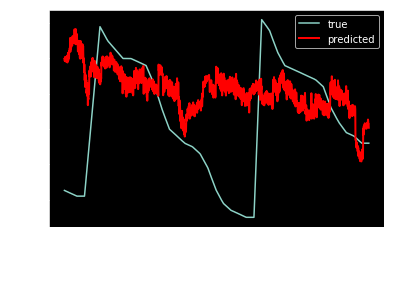

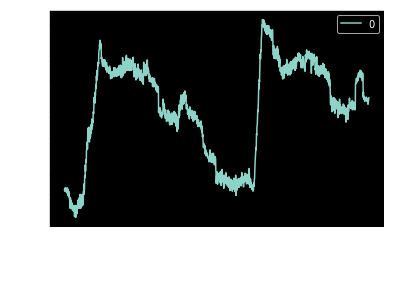

In [104]:
utils.plot_results(df_test, target_field2, y_pred, residuals=resd_test)

In [48]:
resd_test.index

DatetimeIndex(['2019-05-20 00:00:00', '2019-05-20 00:05:00',
               '2019-05-20 00:10:00', '2019-05-20 00:15:00',
               '2019-05-20 00:20:00', '2019-05-20 00:25:00',
               '2019-05-20 00:30:00', '2019-05-20 00:35:00',
               '2019-05-20 00:40:00', '2019-05-20 00:45:00',
               ...
               '2019-05-25 06:55:00', '2019-05-25 07:00:00',
               '2019-05-25 07:05:00', '2019-05-25 07:10:00',
               '2019-05-25 07:15:00', '2019-05-25 07:20:00',
               '2019-05-25 07:25:00', '2019-05-25 07:30:00',
               '2019-05-25 07:35:00', '2019-05-25 07:40:00'],
              dtype='datetime64[ns]', name='datetime', length=1533, freq=None)